In [34]:
import xarray as xr
import glob
import os
import re  # For extracting age information from file names

# Specify the folder containing the .nc files
folder_path = 'D:/VScode/Last_deglaciation/iTraCE_data/TREFHT/All_Forcing'
nc_files = glob.glob(os.path.join(folder_path, '*.nc'))

# List to hold the datasets
ds_list = []

for file_path in nc_files:
    # Extract age information from the file name
    match = re.search(r'(\d+ka)', file_path)
    age_id = match.group(1) if match else 'unknown'
    
    # Open and process the dataset
    ds = xr.open_dataset(file_path)
    ds = ds.rename({'TREFHT': 'sat'})
    annual_avg_sat = ds['sat'].groupby('time.year').mean('time')
    new_ds = annual_avg_sat.to_dataset(name='sat_annual_avg')
    new_ds = new_ds.rename({'year': 'age'})
    new_ds['age'] = 20000 - new_ds['age']
    new_ds = new_ds.assign_coords(age_id=((), age_id))

    # Sort 'age' in descending order to ensure consistency
    new_ds = new_ds.sortby('age', ascending=False)
    
    # Add the processed dataset to the list
    ds_list.append(new_ds)

# Concatenate all datasets along the 'age' dimension
combined_ds = xr.concat(ds_list, dim='age', combine_attrs='no_conflicts')

# After concatenation, sort the combined dataset by 'age' to ensure correct order
combined_ds = combined_ds.sortby('age', ascending=True)

print(combined_ds)


<xarray.Dataset>
Dimensions:         (lat: 96, lon: 144, age: 8007)
Coordinates:
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon             (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * age             (age) int64 11000 11001 11002 11003 ... 19997 19998 19999
    age_id          (age) <U4 '12ka' '12ka' '12ka' ... '20ka' '20ka' '20ka'
Data variables:
    sat_annual_avg  (age, lat, lon) float32 234.0 234.0 234.0 ... 234.4 234.4


In [35]:
combined_ds

<xarray.Dataset>
Dimensions:         (lat: 96, lon: 144, age: 8007)
Coordinates:
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon             (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * age             (age) int64 11000 11001 11002 11003 ... 19997 19998 19999
    age_id          (age) <U4 '12ka' '12ka' '12ka' ... '20ka' '20ka' '20ka'
Data variables:
    sat_annual_avg  (age, lat, lon) float32 234.0 234.0 234.0 ... 234.4 234.4

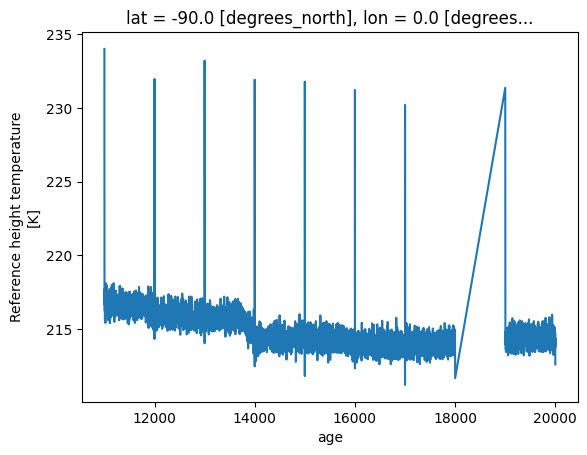

In [36]:
# plot a record from the ds_sat at given lat and lon
combined_ds['sat_annual_avg'].isel(lat=0, lon=0).plot()

In [20]:
import xarray as xr

# Open the dataset
path = 'D:/VScode/Last_deglaciation/iTraCE_data/TREFHT/All_Forcing/b.e13.Bi1850C5.f19_g16.12ka.itrace.01.cam.h0.TREFHT.800001-899912.nc'
ds = xr.open_dataset(path)

# Rename TREFHT to sat without renaming 'time' to 'age'
ds = ds.rename({'TREFHT': 'sat'})

# Calculate the annual average of 'sat'
# Here, we group by 'time.year' since we didn't rename 'time' to 'age'
annual_avg_sat = ds['sat'].groupby('time.year').mean('time')

# Create a new dataset with the annual average data
# The annual average will have a 'year' dimension due to the groupby operation
new_ds = annual_avg_sat.to_dataset(name='sat_annual_avg')

# Now, rename the 'year' dimension to 'age' for clarity
new_ds = new_ds.rename({'year': 'age'})

# Adjust the 'age' values to be '20000 - age'
new_ds['age'] = 20000 - new_ds['age']

new_ds


<xarray.Dataset>
Dimensions:         (lat: 96, lon: 144, age: 1001)
Coordinates:
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon             (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * age             (age) int64 12000 11999 11998 11997 ... 11002 11001 11000
Data variables:
    sat_annual_avg  (age, lat, lon) float32 214.3 214.3 214.3 ... 219.2 219.3

In [29]:
import xarray as xr

# Open the dataset
path = 'D:/VScode/Last_deglaciation/iTraCE_data/TREFHT/All_Forcing/b.e13.Bi1850C5.f19_g16.13ka.itrace.01.cam.h0.TREFHT.700001-799912.nc'
ds = xr.open_dataset(path)

# Rename TREFHT to sat without renaming 'time' to 'age'
ds = ds.rename({'TREFHT': 'sat'})

# Calculate the annual average of 'sat'
# Here, we group by 'time.year' since we didn't rename 'time' to 'age'
annual_avg_sat = ds['sat'].groupby('time.year').mean('time')

# Create a new dataset with the annual average data
# The annual average will have a 'year' dimension due to the groupby operation
new_ds = annual_avg_sat.to_dataset(name='sat_annual_avg')

# Now, rename the 'year' dimension to 'age' for clarity
new_ds = new_ds.rename({'year': 'age'})

# Adjust the 'age' values to be '20000 - age'
new_ds['age'] = 20000 - new_ds['age']

new_ds


<xarray.Dataset>
Dimensions:         (lat: 96, lon: 144, age: 1001)
Coordinates:
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon             (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * age             (age) int64 13000 12999 12998 12997 ... 12002 12001 12000
Data variables:
    sat_annual_avg  (age, lat, lon) float32 214.1 214.1 214.1 ... 218.6 218.6

In [12]:

import xarray as xr
path='D:/VScode/Last_deglaciation/iTraCE_data/TREFHT/All_Forcing/b.e13.Bi1850C5.f19_g16.12ka.itrace.01.cam.h0.TREFHT.800001-899912.nc'
ds = xr.open_dataset(path, engine='netcdf4')
# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})

ds

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, lat: 96, lon: 144, slat: 95, slon: 144,
                   age: 12000, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * slat          (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon          (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
  * age           (age) object 8000-02-01 00:00:00 ... 9000-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    w_stag        (slat) float64 ...
    ...            ...
    n2ovmr        (age) float64 ...
    f11vmr        (age) float64 ...
    f12vmr        (age) float64 ...
    sol_tsi       (age) float64 ...
    nsteph        (age) int32 ...
    sat           (age, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e13.Bi1850C5.f19_g16.12ka.itrace.01
    title:             UNSET
    logname:           czhu95
    host:              r2i6n0
    Version:           $Name$
    revision_Id:       $Id$
    initial_file:      b.e13.Bi1850C5.f19_g16.13ka.itrace.01.cam.i.8000-01-01...
    topography_file:   /glade/p/cgd/ccr/people/tomas/itrace/consistent-topo/c...
    time_period_freq:  month_1

In [14]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, lat: 96, lon: 144, slat: 95, slon: 144,
                   age: 12000, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * slat          (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon          (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
  * age           (age) object 8000-02-01 00:00:00 ... 9000-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    w_stag        (slat) float64 ...
   

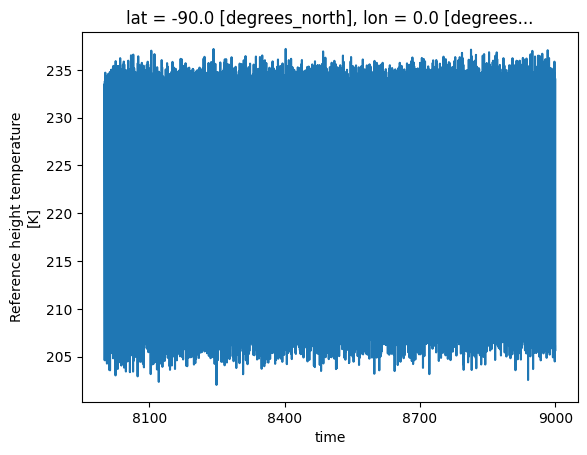

In [13]:
# plot a record from the ds_sat at given lat and lon
ds['sat'].isel(lat=0, lon=0).plot()

In [7]:
ds['time']

<xarray.DataArray 'time' (time: 12000)>
array([cftime.DatetimeNoLeap(8000, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(8000, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(8000, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(8999, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(8999, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(9000, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 8000-02-01 00:00:00 ... 9000-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [6]:
ds['TREFHT']

<xarray.DataArray 'TREFHT' (time: 12000, lat: 96, lon: 144)>
[165888000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 8000-02-01 00:00:00 ... 9000-01-01 00:00:00
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean